### * **What is a phishing attack?**
* phishing attacks are the practice of sending fraudulent communications that appear to come from a reputable source
* Phishing is a type of social engineering attack often used to steal user data, including login credentials and credit card numbers. It occurs when an attacker, masquerading as a trusted entity, dupes a victim into opening an email, instant message, or text message. 


* A spoofed email ostensibly from myuniversity.edu is mass-distributed to as many faculty members as possible. The email claims that the user’s password is about to expire. Instructions are given to go to myuniversity.edu/renewal to renew their password within 24 hours.>

* **About dataset**
* Data is containg 5,49,346 unique entries.
* There are two columns.
* Label column is prediction col which has 2 categories 
    A. Good - which means the urls is not containing malicious stuff and **this site is not a Phishing Site.**
    B. Bad - which means the urls contains malicious stuffs and **this site isa Phishing Site.**
* There is no missing value in the dataset.

##### * Importing some useful libraries

In [1]:
#!pip install selenium

In [1]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics 
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text  
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes  
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from PIL import Image # getting images in notebook
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud

from bs4 import BeautifulSoup # use for scraping the data from website
from selenium import webdriver # use for automation chrome 
import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle# use to dump model 

import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')

* **Loading the main dataset.**

In [2]:
phish_data = pd.read_csv('phishing_site_urls.csv')

In [3]:
phish_data.tail()

,URL,Label
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad
549345,apple-search.info,bad


In [4]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [5]:
phish_data.isnull().sum() # there is no missing values

URL      0
Label    0
dtype: int64

* **Since it is classification problems so let's see the classes are balanced or imbalances**

In [6]:
#create a dataframe of classes counts
label_counts = pd.DataFrame(phish_data.Label.value_counts())

<AxesSubplot:ylabel='Label'>

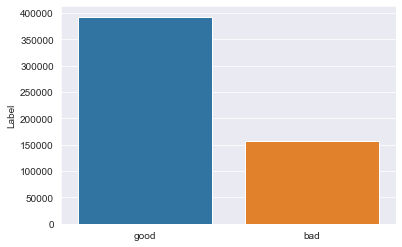

In [7]:
#visualizing target_col
sns.set_style('darkgrid')
sns.barplot(label_counts.index,label_counts.Label)

# Random Under-Sampling

In [8]:
# class count
class_count_0, class_count_1 = phish_data['Label'].value_counts()

# Separate class
class_0 =  phish_data[phish_data['Label'] == "good"]
class_1 =  phish_data[phish_data['Label'] == "bad"]



total class of 1 and0: good    156422
bad     156422
Name: Label, dtype: int64


<AxesSubplot:title={'center':'Random Under-Sampling'}>

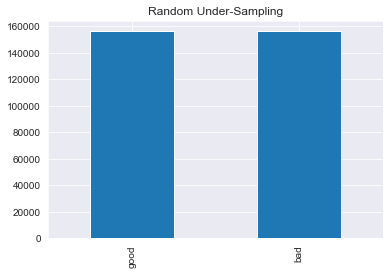

In [9]:
class_0_under = class_0.sample(class_count_1)

phish_data = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",phish_data['Label'].value_counts())# plot the count after under-sampeling
phish_data['Label'].value_counts().plot(kind='bar', title='Random Under-Sampling')

### Preprocessing

* **Now that we have the data, we have to vectorize our URLs. I used CountVectorizer and gather words using tokenizer, since there are words in urls that are more important than other words e.g ‘virus’, ‘.exe’ ,’.dat’ etc. Lets convert the URLs into a vector form.**

#### RegexpTokenizer
* A tokenizer that splits a string using a regular expression, which matches either the tokens or the separators between tokens.

In [10]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [11]:
phish_data.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [12]:
# this will be pull letter which matches to expression
tokenizer.tokenize(phish_data.URL[0]) # using first row

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [13]:
print('Getting words tokenized ...')

phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows


Getting words tokenized ...


In [14]:
phish_data.sample(5)

,URL,Label,text_tokenized
537654,j905sgj.tfusas.top/index.php?znePf7KUKRnLAoQ=l...,bad,"[j, sgj, tfusas, top, index, php, znePf, KUKRn..."
199821,il.linkedin.com/pub/dir/+/Engel,good,"[il, linkedin, com, pub, dir, Engel]"
367236,kansas.com/2011/06/10/1886123/self-content-wit...,good,"[kansas, com, self, content, with, kus, roster..."
159811,collegesearch.collegeboard.com/search/CollegeD...,good,"[collegesearch, collegeboard, com, search, Col..."
243334,steven-howell.suite101.com/montreals-osheaga-m...,good,"[steven, howell, suite, com, montreals, osheag..."


#### SnowballStemmer
* Snowball is a small string processing language, gives root words

In [15]:
stemmer = SnowballStemmer("english") 

In [16]:
print('Getting words stemmed ...')

phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])


Getting words stemmed ...


In [17]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed
129159,chiatena.zxy.me/presentations/dir/auth/view/do...,bad,"[chiatena, zxy, me, presentations, dir, auth, ...","[chiatena, zxi, me, present, dir, auth, view, ..."
324441,evri.com/person/macgillivray-milne-0x557b15,good,"[evri, com, person, macgillivray, milne, x, b]","[evri, com, person, macgillivray, miln, x, b]"
252320,uk.ask.com/wiki/Bohinj,good,"[uk, ask, com, wiki, Bohinj]","[uk, ask, com, wiki, bohinj]"
450319,trainvideodepot.com/DVD-Lionel-Legends---The-H...,good,"[trainvideodepot, com, DVD, Lionel, Legends, T...","[trainvideodepot, com, dvd, lionel, legend, th..."
401013,myspace.com/video/vid/4652642,good,"[myspace, com, video, vid]","[myspac, com, video, vid]"


In [18]:
print('Getting joiningwords ...')

phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))


Getting joiningwords ...


In [19]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
160198,commons.wikimedia.org/wiki/Category:1827_births,good,"[commons, wikimedia, org, wiki, Category, births]","[common, wikimedia, org, wiki, categori, birth]",common wikimedia org wiki categori birth
503368,travelnesia.net/df30xpqx,bad,"[travelnesia, net, df, xpqx]","[travelnesia, net, df, xpqx]",travelnesia net df xpqx
102076,sweetenglish.ir/stain/dropbox/mail.163.com/acc...,bad,"[sweetenglish, ir, stain, dropbox, mail, com, ...","[sweetenglish, ir, stain, dropbox, mail, com, ...",sweetenglish ir stain dropbox mail com account...
455644,unlvrebels.com/sports/m-baskbl/spec-rel/unlv-m...,good,"[unlvrebels, com, sports, m, baskbl, spec, rel...","[unlvrebel, com, sport, m, baskbl, spec, rel, ...",unlvrebel com sport m baskbl spec rel unlv m b...
411633,palmercash.com/,good,"[palmercash, com]","[palmercash, com]",palmercash com


### Visualization 
**1. Visualize some important keys using word cloud**

In [21]:
#sliceing classes
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']

In [22]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [23]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
380974,lyricsmode.com/lyrics/s/sonny_terry_brownie_mc...,good,"[lyricsmode, com, lyrics, s, sonny, terry, bro...","[lyricsmod, com, lyric, s, sonni, terri, brown...",lyricsmod com lyric s sonni terri browni mcghee
235817,rongletherow.com/index.php?lalp=dave-van-horn-...,good,"[rongletherow, com, index, php, lalp, dave, va...","[rongletherow, com, index, php, lalp, dave, va...",rongletherow com index php lalp dave van horn ...
222673,nz.answers.yahoo.com/question/index?qid=200911...,good,"[nz, answers, yahoo, com, question, index, qid...","[nz, answer, yahoo, com, question, index, qid,...",nz answer yahoo com question index qid aa kgx
362111,infoplease.com/ipa/A0777584.html,good,"[infoplease, com, ipa, A, html]","[infopleas, com, ipa, a, html]",infopleas com ipa a html
343460,fullnamedirectory.com/page72246.html,good,"[fullnamedirectory, com, page, html]","[fullnamedirectori, com, page, html]",fullnamedirectori com page html


* create a function to visualize the important keys from url 

In [24]:
#Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates 
#its frequency or importance. Significant textual data points can be highlighted using a word cloud 

from wordcloud import WordCloud ,STOPWORDS
bad_sites = ""
good_sites = ""
stopwords= set(STOPWORDS)
#iterate through the data
for val in phish_data[phish_data.Label == 'bad'].text_sent:
    
    #split the value
    tokens = val.split()
    
    #convet each tokens into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    bad_sites += " ".join(tokens)+ " "
    
for val in phish_data[phish_data.Label == 'good'].text_sent:
    
    #split the value
    tokens = val.split()
    
    #convet each tokens into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    good_sites += " ".join(tokens)+ " "
    


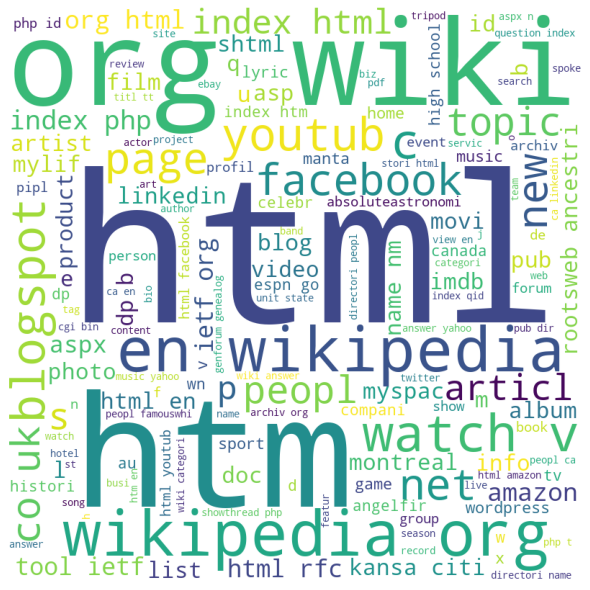

In [25]:
#for good sites

wordcloud = WordCloud(width= 800,height=800,background_color="white",stopwords=stopwords,
                     min_font_size =10).generate(good_sites)

#plotting the wordcloud image
plt.figure(figsize=(8,8))
plt.imshow(wordcloud) #pyplot module of matplotlib library is used to display data as an image; i.e. on a 2D regular raster.
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


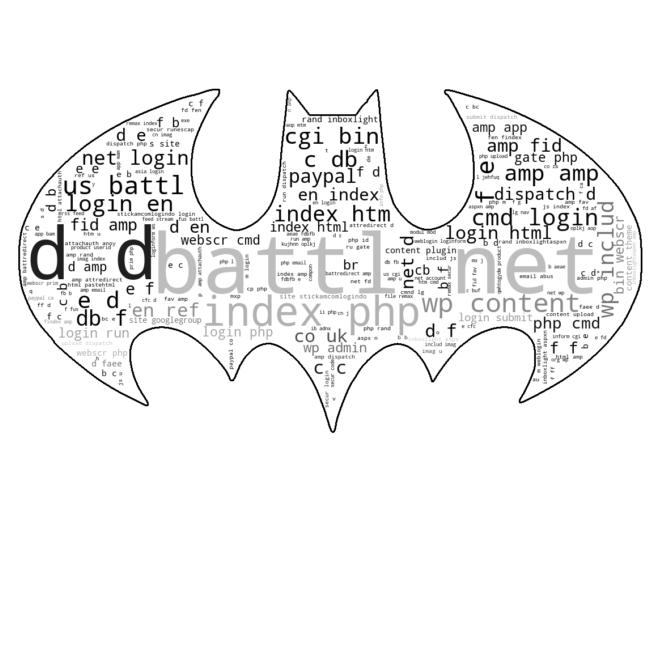

In [26]:
# for bad sites

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt #to display our wordcloud
from PIL import Image #to load our image
import numpy as np #to get the color of our image

#Content-related

stopwords = set(STOPWORDS)

#Appearance-related
custom_mask = np.array(Image.open('batman.png')) 
wc = WordCloud(width= 800,height=800,background_color = 'white',
               stopwords = stopwords,
               mask = custom_mask,
               contour_width = 3,
               contour_color = 'black')

wc.generate(bad_sites)
image_colors = ImageColorGenerator(custom_mask)
wc.recolor(color_func = image_colors)

#Plotting
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

wc.to_file('Batman_wordcloud.png')

**2. Visualize internal links, it will shows all redirect links.** 

#### Chrome webdriver
* WebDriver tool use for automated testing of webapps across many browsers. It provides capabilities for navigating to web pages, user input and more

In [20]:
browser = webdriver.Chrome(executable_path=r"C:\chromedriver\chromedriver")


* After set up the Chrome driver create two lists.
* First list named list_urls holds all the pages you’d like to scrape.
* Second, create an empty list where you’ll append links from each page.


In [28]:
#phish_data

In [29]:
list_urls = ['https://www.theweathernetwork.com/school..','https://myspace.com/louie.rankin8/music/song/showdown-lp-version-2-116954860'] #here i take phishing sites 
links_with_text = []

* I took some phishing site to see were the hackers redirect(on different link) us.
* Use the BeautifulSoup library to extract only relevant hyperlinks for Google, i.e. links only with '<'a'>' tags with href attributes. 

#### BeautifulSoup
* It is use for getting data out of HTML, XML, and other markup languages. 

In [30]:
for url in list_urls:
    browser.get(url)
    soup = BeautifulSoup(browser.page_source,"html.parser")
    for line in soup.find_all('a'):
        href = line.get('href')
        links_with_text.append([url, href])

#### Turn the URL’s into a Dataframe
* After you get the list of your websites with hyperlinks turn them into a Pandas DataFrame with columns “from” (URL where the link resides) and “to” (link destination URL)

In [31]:
df = pd.DataFrame(links_with_text, columns=["from", "to"])

In [32]:
df.tail(40)

,from,to
219,https://myspace.com/louie.rankin8/music/song/s...,/emperorshabbaranks/music
220,https://myspace.com/louie.rankin8/music/song/s...,/capletonkingshango/music
221,https://myspace.com/louie.rankin8/music/song/s...,/louie.rankin8/music
222,https://myspace.com/louie.rankin8/music/song/s...,/louie.rankin8/music/albums
223,https://myspace.com/louie.rankin8/music/song/s...,/louie.rankin8/music/album/showdown-1
224,https://myspace.com/louie.rankin8/music/song/s...,None
225,https://myspace.com/louie.rankin8/music/song/s...,None
226,https://myspace.com/louie.rankin8/music/song/s...,None
227,https://myspace.com/louie.rankin8/music/song/s...,None
228,https://myspace.com/louie.rankin8/music/song/s...,/louie.rankin8/music/song/showdown-lp-version-...


#### Step 3: Draw a graph
* Finally, use the aforementioned DataFrame to **visualize an internal link structure by feeding it to the Networkx method from_pandas_edgelist first** and draw it by calling nx.draw

AttributeError: module 'matplotlib.cbook' has no attribute 'iterable'

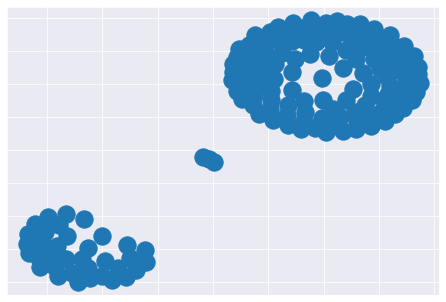

In [33]:
GA = nx.from_pandas_edgelist(df, source="from", target="to")
nx.draw(GA)


### Creating Model

#### CountVectorizer
* CountVectorizer is used to transform a corpora of text to a vector of term / token counts.

In [34]:
#create cv object
cv = CountVectorizer()

In [35]:
feature = cv.fit_transform(phish_data.text_sent) #transform all text which we tokenize and stemed

#### * Spliting the data 

In [58]:
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label,random_state=5)

### LogisticRegression
* Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

In [38]:
# create lr object
lr = LogisticRegression()

In [39]:
lr.fit(trainX,trainY)

LogisticRegression()

In [40]:
lr.score(testX,testY)

0.9584457429261869

.*** Logistic Regression is giving 95.84% accuracy, Now we will store scores in dict to see which model perform best**

In [41]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.9812600955534814
Testing Accuracy : 0.9584457429261869

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.95      0.97      0.96     38473
        Good       0.97      0.95      0.96     39738

    accuracy                           0.96     78211
   macro avg       0.96      0.96      0.96     78211
weighted avg       0.96      0.96      0.96     78211


CONFUSION MATRIX


<AxesSubplot:>

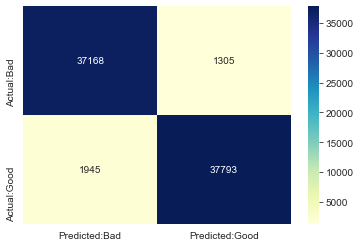

In [42]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

### MultinomialNB
* Applying Multinomial Naive Bayes to NLP Problems. Naive Bayes Classifier Algorithm is a family of probabilistic algorithms based on applying Bayes' theorem with the “naive” assumption of conditional independence between every pair of a feature.

In [43]:
# create mnb object
mnb = MultinomialNB()

In [44]:
mnb.fit(trainX,trainY)

MultinomialNB()

In [45]:
mnb.score(testX,testY)

0.9482937182749229

*** MultinomialNB gives us 94.8% accuracy**  

In [46]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

Training Accuracy : 0.9673234370271871
Testing Accuracy : 0.9482937182749229

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.94      0.96      0.95     38109
        Good       0.96      0.94      0.95     40102

    accuracy                           0.95     78211
   macro avg       0.95      0.95      0.95     78211
weighted avg       0.95      0.95      0.95     78211


CONFUSION MATRIX


<AxesSubplot:>

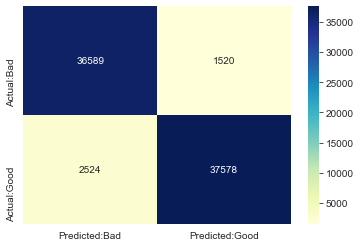

In [47]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

<AxesSubplot:ylabel='Accuracy'>

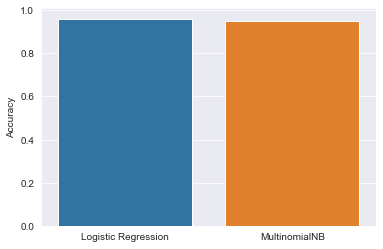

In [48]:
acc = pd.DataFrame.from_dict(Scores_ml,orient = 'index',columns=['Accuracy'])
sns.set_style('darkgrid')
sns.barplot(acc.index,acc.Accuracy)

*** So, Logistic Regression is the best fit model, Now we make sklearn pipeline using Logistic Regression**

In [59]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())


In [62]:
trainX, testX, trainY, testY = train_test_split(phish_data.URL, phish_data.Label)

In [63]:
pipeline_ls.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [64]:
pipeline_ls.score(testX,testY) 

0.9603252739384486

In [65]:
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))

In [66]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.9603252739384486


# prediction system

In [56]:
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
loaded_model = pickle.load(open('phishing.pkl', 'rb'))

result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("*"*30)
print(result2)

['bad' 'bad' 'bad' 'bad']
******************************
['good' 'good' 'good' 'good']
